# Segmentation

In [451]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



class Segmentation(object):
    @staticmethod
    def segmentCut(image, document_text):
        segmentFile=open(document_text, 'r')
        
        lines = segmentFile.readlines()
        listOfWordPics=list()
        
        for line in lines:
            left0, top0, right0, bottom0, content = line.split(" ")
            left=int(left0)
            right=int(right0)
            top=int(top0)
            bottom=int(bottom0)
            
            word=image.crop((left, top, right, bottom))
            listOfWordPics.append((word,content))
        
        return listOfWordPics




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# BagOfFeatures

### Import-Section

In [452]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import scipy.signal
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import PIL.Image as Image

# matplotlib.use('Qt5Agg')

import cv2
import numpy as np
import os
import pickle




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1. Für den gesamten Datensatz:
- Graustufen-Darstellung erzeugen
- Auf Vektoren reduzieren (lokale Bild-Deskriptoren - SIFT)

2. Visual Vocabulary finden 
- Clustern
- Gewichten

3. Quantisieren
- Abbildung von Deskriptoren auf Centruiden
- Wie oft kommt ein vis. Word aus dem vis. Voc in dem Bild vor
-> Histogramm

4. Distanzen zwischen den Histogrammen vergleichen

In [453]:
from common import features
from scipy.cluster.vq import kmeans2
documentSegmentation=os.path.join('GT', '2700270.gtp')
documentImage=os.path.join('pages', '2700270.png')
image=Image.open(documentImage)


wordImageList=Segmentation.segmentCut(image, documentSegmentation)

In [454]:
import pathlib

#plt.figure()
#wordImageList[5][0].show()

#document_image_filename = os.path.join('pages', wordnames[i])
#img = cv2.imread(wordImageList[5][0])


In [455]:
image=np.array(wordImageList[5][0])
image

array([[205, 206, 208, ..., 207, 208, 209],
       [207, 206, 206, ..., 207, 207, 207],
       [207, 207, 206, ..., 211, 211, 208],
       ...,
       [207, 206, 205, ..., 204, 204, 203],
       [205, 203, 203, ..., 193, 193, 193],
       [200, 199, 199, ..., 160, 159, 158]], dtype=uint8)

In [456]:

frames, desc = features.compute_sift_descriptors(image,step_size = 15,cell_size = 3)
desc

array([[  0.,   3.,  16., ...,   2., 123.,  77.],
       [ 24.,   0.,   0., ...,  25., 153.,  27.],
       [  3., 110.,  38., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,  67., ...,   0.,  26., 120.],
       [  8.,  45.,  12., ..., 131.,  59.,   0.],
       [  1.,   1.,   0., ...,  12.,  80.,  44.]], dtype=float32)

In [457]:
from common import features
from scipy.cluster.vq import kmeans2

#init.
step_size = 15
cell_size = 3
n_centroids = 4
histograms=[]
namesOfwords=[]
# ?müssen wir wir erst wieder die visu. Words finden (scannen aller Bilder)
#For all Images:
#- Change Color scale to gray
#- build SIFT representation
for word in wordImageList:
    image=np.array(word[0])

    frames, desc = features.compute_sift_descriptors(image,step_size = 15,cell_size = 3)

    #Open CV nutzen 

    #clustering of SIFT descriptors
    # ?sollten wir nicht villeicht lieber mit den Zentruiden arbeiten?
    # Wurde schon auf 8 Hautrichtungen quantisiert?
    centroid, labels = kmeans2(desc, n_centroids, iter=20, minit='points')

    #Warum erstellen wir wieder ein Histogramm?
    # Reicht es nicht aus mit den Zentruiden zu arbeiten?
    hist = np.bincount(labels)
    histograms.append(hist)
    namesOfwords.append(word[1])

print(histograms)

[array([ 9, 10,  9,  8], dtype=int64), array([47, 19, 28, 18], dtype=int64), array([18, 17, 32, 18], dtype=int64), array([23, 14, 21, 12], dtype=int64), array([49, 79, 46, 48], dtype=int64), array([18, 17, 40, 21], dtype=int64), array([ 8, 15, 16, 11], dtype=int64), array([24, 23, 18, 15], dtype=int64), array([13, 23, 16, 11], dtype=int64), array([21, 11, 16,  6], dtype=int64), array([49, 27, 38, 40], dtype=int64), array([ 7,  6, 20,  7], dtype=int64), array([12, 16, 24, 16], dtype=int64), array([9, 9, 7, 5], dtype=int64), array([27, 37, 28, 23], dtype=int64), array([ 7, 11, 15,  7], dtype=int64), array([27, 12,  9,  8], dtype=int64), array([22, 37, 27, 26], dtype=int64), array([ 7,  4, 13,  6], dtype=int64), array([12, 15, 35, 16], dtype=int64), array([5, 4, 6, 5], dtype=int64), array([3, 7, 7, 3], dtype=int64), array([12, 11, 20, 17], dtype=int64), array([18,  8, 22, 12], dtype=int64), array([2, 3, 4, 1], dtype=int64), array([20, 13, 23, 20], dtype=int64), array([ 5, 15, 10, 12], dty

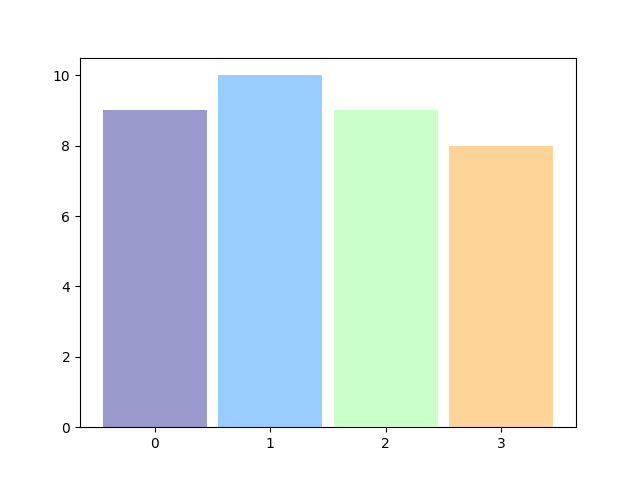

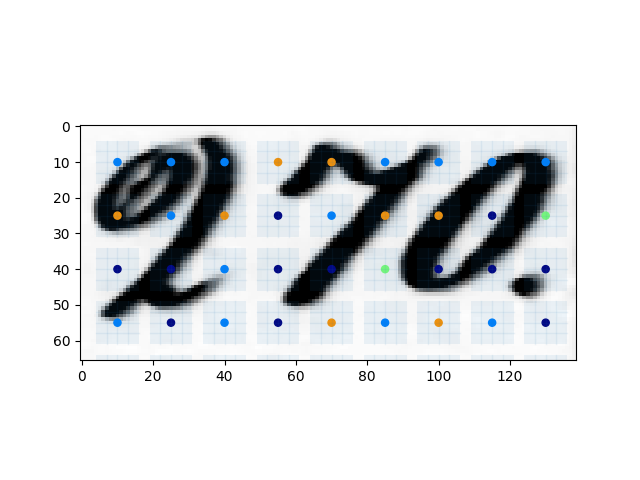

In [458]:
'''
def classify1k(train_samples, train_labels,test_samples, metric='euclidean'):
    distances = ds.cdist(train_samples, test_samples, metric=metric)
    test_labels_indices = np.argmin(distances, axis=0)
    return train_labels[test_labels_indices]


result=classify1k(train_samples=histograms[:3],train_labels=train_labels,test_samples=test,metric='euclidean')
result

'''





from matplotlib.patches import Circle, Rectangle
from matplotlib.lines import Line2D

draw_descriptor_cells = True
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.array(wordImageList[0][0]), cmap=cm.get_cmap('Greys_r'))
ax.autoscale(enable=False)
colormap = cm.get_cmap('jet')
desc_len = cell_size * 4
for (x, y), label in zip(frames, labels):
    color = colormap(label / float(n_centroids))
    circle = Circle((x, y), radius=1, fc=color, ec=color, alpha=1)
    rect = Rectangle((x - desc_len / 2, y - desc_len / 2),
                     desc_len, desc_len, alpha=0.08, lw=1)
    ax.add_patch(circle)
    if draw_descriptor_cells:
        for p_factor in [0.25, 0.5, 0.75]:
            offset_dyn = desc_len * (0.5 - p_factor)
            offset_stat = desc_len * 0.5
            line_h = Line2D((x - offset_stat, x + offset_stat),
                            (y - offset_dyn, y - offset_dyn), alpha=0.08, lw=1)
            line_v = Line2D((x - offset_dyn, x - offset_dyn),
                            (y - offset_stat, y + offset_stat), alpha=0.08, lw=1)
            ax.add_line(line_h)
            ax.add_line(line_v)
    ax.add_patch(rect)




y_values=histograms[0]
x_pos = np.arange(len(y_values))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x_pos, y_values, width=0.9, align='center', alpha=0.4,color=[colormap(i / float(n_centroids)) for i in x_pos])

ax.set_xticks(x_pos)
plt.show()

In [459]:
"""

from common.classification import KNNClassifier
import scipy.spatial.distance as ds


knn_classifier = KNNClassifier(k_neighbors=3, metric='euclidean')
knn_classifier.estimate(train_samples=histograms[:3],train_labels=train_labels)
knn_test_labels = knn_classifier.classify2(test_samples=test)
knn_test_labels


"""





"\n\nfrom common.classification import KNNClassifier\nimport scipy.spatial.distance as ds\n\n\nknn_classifier = KNNClassifier(k_neighbors=3, metric='euclidean')\nknn_classifier.estimate(train_samples=histograms[:3],train_labels=train_labels)\nknn_test_labels = knn_classifier.classify2(test_samples=test)\nknn_test_labels\n\n\n"

In [460]:
"""

def classify1k(train_samples, train_labels,test_samples, metric='euclidean'):
    distances = ds.cdist(train_samples, test_samples, metric=metric)
    test_labels_indices = np.argmin(distances, axis=0)
    return train_labels[test_labels_indices]


result=classify1k(train_samples=histograms[:3],train_labels=train_labels,test_samples=test,metric='euclidean')
result
"""


'''




from matplotlib.patches import Circle, Rectangle
from matplotlib.lines import Line2D

draw_descriptor_cells = True
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(im_arr, cmap=cm.get_cmap('Greys_r'))
ax.autoscale(enable=False)
colormap = cm.get_cmap('jet')
desc_len = cell_size * 4
for (x, y), label in zip(frames, labels):
    color = colormap(label / float(n_centroids))
    circle = Circle((x, y), radius=1, fc=color, ec=color, alpha=1)
    rect = Rectangle((x - desc_len / 2, y - desc_len / 2),
                     desc_len, desc_len, alpha=0.08, lw=1)
    ax.add_patch(circle)
    if draw_descriptor_cells:
        for p_factor in [0.25, 0.5, 0.75]:
            offset_dyn = desc_len * (0.5 - p_factor)
            offset_stat = desc_len * 0.5
            line_h = Line2D((x - offset_stat, x + offset_stat),
                            (y - offset_dyn, y - offset_dyn), alpha=0.08, lw=1)
            line_v = Line2D((x - offset_dyn, x - offset_dyn),
                            (y - offset_stat, y + offset_stat), alpha=0.08, lw=1)
            ax.add_line(line_h)
            ax.add_line(line_v)
    ax.add_patch(rect)
plt.show()


hist = np.bincount(labels)
hist


y_values=hist
x_pos = np.arange(len(y_values))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x_pos, y_values, width=0.9, align='center', alpha=0.4,color=[colormap(i / float(n_centroids)) for i in x_pos])

ax.set_xticks(x_pos)
plt.show()
'''







"\n\n\n\n\nfrom matplotlib.patches import Circle, Rectangle\nfrom matplotlib.lines import Line2D\n\ndraw_descriptor_cells = True\nfig = plt.figure()\nax = fig.add_subplot(111)\nax.imshow(im_arr, cmap=cm.get_cmap('Greys_r'))\nax.autoscale(enable=False)\ncolormap = cm.get_cmap('jet')\ndesc_len = cell_size * 4\nfor (x, y), label in zip(frames, labels):\n    color = colormap(label / float(n_centroids))\n    circle = Circle((x, y), radius=1, fc=color, ec=color, alpha=1)\n    rect = Rectangle((x - desc_len / 2, y - desc_len / 2),\n                     desc_len, desc_len, alpha=0.08, lw=1)\n    ax.add_patch(circle)\n    if draw_descriptor_cells:\n        for p_factor in [0.25, 0.5, 0.75]:\n            offset_dyn = desc_len * (0.5 - p_factor)\n            offset_stat = desc_len * 0.5\n            line_h = Line2D((x - offset_stat, x + offset_stat),\n                            (y - offset_dyn, y - offset_dyn), alpha=0.08, lw=1)\n            line_v = Line2D((x - offset_dyn, x - offset_dyn),\n   